Missing Value - Feature Engineering

#### MCAR (Missing Completely at Random):                       

In [37]:
import numpy as np
import pandas as pd

df = pd.read_csv('datasets/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


#### Missing Data not at Random (MNAR): 
There is absolutly some relationship between the data missing and any other value, observed or missing, within the datasets.

In [11]:
df['cabin_null'] = np.where(df['Cabin'].isnull(),1,0)
df['cabin_null'].mean()

0.7710437710437711

In [13]:
df.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

#### Missing at Random (MAR):
>1. Mean / Median / Mode imputation
>2. Random Sample imputation
>3. Capturing NaN values with a new features
>4. End of Distribution imputation
>5. Arbitrary Imputation
>6. Frequant Category Imputation

### 1.Mean / Median / Mode Imputation:
When Should be apply this:
It has assumption that data are missing completly at random(MCAR).
We solve this by replacing the NaN with most frequent variable.
to overcome the outlier use median or mode.

In [14]:
df = pd.read_csv('datasets/titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
# Check % of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [16]:
def imput_nan(df,variable,cal):
    df[variable+'_median'] = df[variable].fillna(cal)


In [17]:
median = df['Age'].median()
median

28.0

In [18]:
imput_nan(df,'Age',median)

In [20]:
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [19]:
df.isnull().mean()

Survived      0.000000
Age           0.198653
Fare          0.000000
Age_median    0.000000
dtype: float64

In [21]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


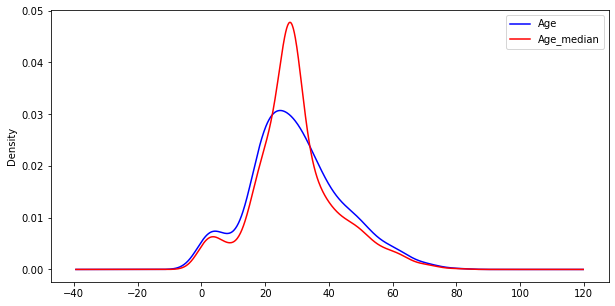

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10,5))
ax = df['Age'].plot(kind='kde', color='blue')
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines,labels, loc='best')
plt.show()

In [ ]:
# Advantage:
Easy to implement (Robust to outliers)
Faster way to obtain the complete dataset

# Disadvantages:
Change or Distortion in original variance of the data

#### Capturing NaN with a new feature
> It works well if the data are not missing completly at random

In [38]:
df = pd.read_csv('datasets/titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [41]:
df['Age_NAN'] = np.where(df['Age'].isnull(),1,0)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [42]:
df.Age.median()

28.0

In [43]:
df.Age.fillna(df.Age.median(), inplace=True)
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


#### Advantage:
1. Easy to implement
2. capture the importance of missing values
#### Disadvantage
1. Creating additional features (curse of dimensionality)

#### End of Distribution Imputation

In [46]:
df = pd.read_csv('datasets/titanic.csv', usecols = ['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

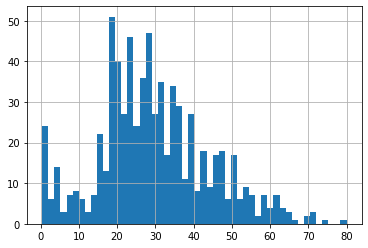

In [48]:
df.Age.hist(bins=50)

In [57]:
extream = df.Age.mean()+3*df.Age.std()  # Value after 3rd Standard distribution
# in given data we have only rigt side outliner

C:\Users\sjain191\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

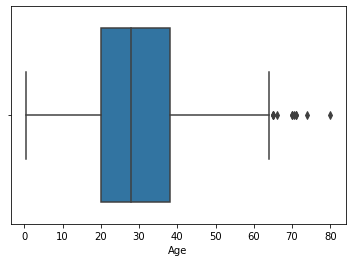

In [52]:
import seaborn as sns
sns.boxplot('Age',data=df)

In [55]:
def imput_nan(df, var, median, extream):
    df[var+'_end_distribution'] = df[var].fillna(extream)
    df[var].fillna(median, inplace=True)

In [58]:
imput_nan(df,'Age',df.Age.median(),extream)
df.head()

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

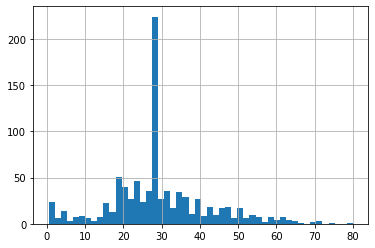

In [59]:
df.Age.hist(bins=50)

<AxesSubplot:>

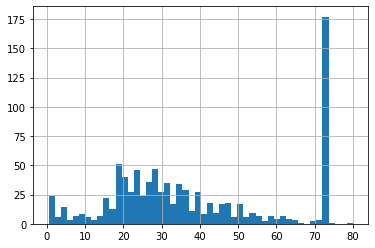

In [62]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\sjain191\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

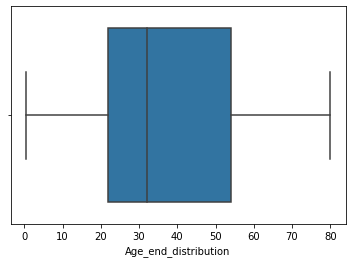

In [63]:
sns.boxplot('Age_end_distribution', data=df)

> in 'Age_end_distribution' outliner gone. but outliner capture at end of the distribution

Advantage:
    Easy to implement
    Capture the importance of missingness if there is one
    
Disadvantage:
    Distorts the original distribution of the variable
    If missingness is not importance, it may mask the predictive power of the original variable by distorting its distribution
    If the number of NAN is high, it will mask true outlineris in the distribution
    If the number of NAN is low, replace NAN may be considered an outliner and preprocessed in a subsequent